In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('dataOneHot/', one_hot=True)

W0807 01:04:31.855593 140549755098880 deprecation.py:323] From <ipython-input-2-8e926371c039>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0807 01:04:31.856710 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0807 01:04:31.858271 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting dataOneHot/train-images-idx3-ubyte.gz


W0807 01:04:32.075746 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0807 01:04:32.078369 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0807 01:04:32.120748 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.lea

Extracting dataOneHot/train-labels-idx1-ubyte.gz
Extracting dataOneHot/t10k-images-idx3-ubyte.gz
Extracting dataOneHot/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.02
training_epochs = 500 # 학습횟수
batch_size = 256 # 배치 개수
display_step = 10 # 손실 함수 출력 주기
examples_to_show = 10 # 보여줄 MNIST Reconstruction 이미지 개수
input_size = 784 # 28x28
hidden1_size = 256
hidden2_size = 128
tolerance = 0.000001

In [4]:
# Autoencoder는 Unsupervised Learning이므로 타겟 레이블(label) y가 필요하지 않습니다.
x = tf.placeholder(tf.float32, shape=[None,input_size], name='input')

In [5]:
def build_autoencoder(x):
    # 인코딩(Encoding): 784 -> 256 -> 128
    W1 = tf.Variable(tf.random_normal(shape=[input_size, hidden1_size]), name='W1')
    b1 = tf.Variable(tf.random_normal(shape=[hidden1_size]), name='b1')
    H1_output = tf.nn.sigmoid(tf.matmul(x,W1) + b1)
    W2 = tf.Variable(tf.random_normal(shape=[hidden1_size, hidden2_size]), name='W2')
    b2 = tf.Variable(tf.random_normal(shape=[hidden2_size]), name='b2')
    H2_output = tf.nn.sigmoid(tf.matmul(H1_output,W2) + b2)
    # 디코딩(decoding): 128 -> 256-> -> 784
    W3 = tf.Variable(tf.random_normal(shape=[hidden2_size, hidden1_size]), name='W3')
    b3 = tf.Variable(tf.random_normal(shape=[hidden1_size]), name='b3')
    H3_output = tf.nn.sigmoid(tf.matmul(H2_output,W3) + b3)
    W4 = tf.Variable(tf.random_normal(shape=[hidden1_size, input_size]), name='W4')
    b4 = tf.Variable(tf.random_normal(shape=[input_size]), name='b4')
    reconstructed_x = tf.nn.sigmoid(tf.matmul(H3_output,W4) + b4)    
    return reconstructed_x

In [6]:
y_pred = build_autoencoder(x)
y_true = x # 타겟 데이터는 입력과 같습니다.

In [7]:
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)
tf.summary.scalar("Loss", loss)

W0807 01:04:32.520188 140549755098880 deprecation.py:323] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 01:04:32.614243 140549755098880 deprecation.py:506] From /home/teoac/solarisTutorial/lib/python3.5/site-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<tf.Tensor 'Loss:0' shape=() dtype=string>

Epoch: 1, Loss: 0.340150
Epoch: 10, Loss: 0.078823
Epoch: 20, Loss: 0.059008
Epoch: 30, Loss: 0.054419
Epoch: 40, Loss: 0.049808
Epoch: 50, Loss: 0.046552
Epoch: 60, Loss: 0.044340
Epoch: 70, Loss: 0.042080
Epoch: 80, Loss: 0.039257
Epoch: 90, Loss: 0.036327
Epoch: 100, Loss: 0.033966
Epoch: 100, Loss: 0.033966


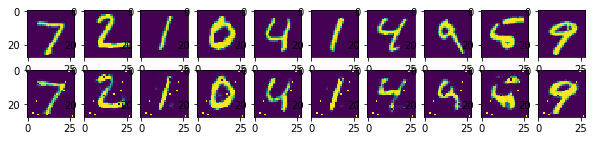

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    merged = tf.summary.merge_all()
    tensorboard_writer = tf.summary.FileWriter('./tensorboard_log', sess.graph)
    epoch = 0
    average_loss_prev = 0.0
    while epoch < training_epochs:
        average_loss = 0.0
        #전체 배치를 불러옵니다.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 모든 배치들에 대해서 최적화를 수행합니다.
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # 옵티마이저를 실행해서 파라미터들을 업데이트 합니다.
            _, current_loss = sess.run([train_step, loss], feed_dict={x:batch_x})
            # 평균 손실을 측정합니다.
            average_loss += current_loss / total_batch
        # 텐서보드에 기록합니다.
        summary = sess.run(merged, feed_dict={x: batch_x})
        tensorboard_writer.add_summary(summary, epoch)
        # 지정된 epoch마다 학습결과를 출력합니다.
        if epoch%display_step == display_step-1 or epoch == 0:
            print('Epoch: %d, Loss: %f' %((epoch+1), average_loss))
        #수렴했으면 학습종료
        if abs(average_loss_prev - average_loss) < tolerance:
            print('Epoch: %d, Loss: %f' %((epoch+1), average_loss))
            break
        average_loss_prev = average_loss
        epoch += 1
    
    # 테스트 이미지로 Reconstruction을 수행합니다.
    reconstructed_result = sess.run(y_pred, feed_dict={x:mnist.test.images[:examples_to_show]})
    # 원본 MNIST 데이터와 Reconstruction 결과를 비교합니다.
    f, a = plt.subplots(2,10, figsize=(10,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
        a[1][i].imshow(np.reshape(reconstructed_result[i], (28,28)))
    f.savefig('reconstucted_mnist_image_tutorial.png')